#### 图像的滤波器与卷积

**仿真数据演示卷积层实现Sobel滤波器**
+ 生成仿真图像数据
+ 将x方向Sobel滤波器参数导入2维卷积层神经网络的权值
$$\left[\begin{matrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{matrix} \right]$$
+ 计算仿真图像输入卷积层的输出
+ 图像x和y方向个padding扩展1个像素

In [1]:
import numpy as np
import tensorflow as tf

X = np.array([[0,0,1,1,0,0],[0,1,7,6,1,0],[0,1,8,8,2,0],[0,1,2,5,1,0],[0,0,1,1,0,0],[0,0,0,0,0,0]],dtype='float32')
kernel_x = np.array([[-1,0,+1],[-2,0,+2],[-1,0,+1]],dtype='float32')

Y = tf.nn.conv2d(tf.reshape(X,[1,6,6,1]),tf.reshape(kernel_x,[3,3,1,1]),strides=1,padding='SAME')

print("Input:\n", X)
print("\nOutput:\n", Y[0,:,:,0])

Input:
 [[0. 0. 1. 1. 0. 0.]
 [0. 1. 7. 6. 1. 0.]
 [0. 1. 8. 8. 2. 0.]
 [0. 1. 2. 5. 1. 0.]
 [0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]

Output:
 tf.Tensor(
[[  1.   9.   7.  -8.  -8.  -1.]
 [  3.  23.  18. -19. -21.  -4.]
 [  4.  25.  23. -19. -27.  -6.]
 [  3.  13.  16.  -9. -19.  -4.]
 [  1.   4.   6.  -3.  -7.  -1.]
 [  0.   1.   1.  -1.  -1.   0.]], shape=(6, 6), dtype=float32)


**池化层演示**
+ 使用$2\times 2$，跨度为2的最大值池化层处理卷积输出图像
+ 使用$2\times 2$，跨度为2的平均值池化层处理卷积输出图像

In [2]:
Y_maxpooling = tf.nn.max_pool2d(Y,ksize=(2,2),strides=(2,2),padding="VALID")
Y_avgpooling = tf.nn.avg_pool2d(Y,ksize=(2,2),strides=(2,2),padding="VALID")

print("Input:\n", Y[0,:,:,0])
print("\nMax Pooling:\n", Y_maxpooling[0,:,:,0])
print("\nAverage Pooling:\n", Y_avgpooling[0,:,:,0])

Input:
 tf.Tensor(
[[  1.   9.   7.  -8.  -8.  -1.]
 [  3.  23.  18. -19. -21.  -4.]
 [  4.  25.  23. -19. -27.  -6.]
 [  3.  13.  16.  -9. -19.  -4.]
 [  1.   4.   6.  -3.  -7.  -1.]
 [  0.   1.   1.  -1.  -1.   0.]], shape=(6, 6), dtype=float32)

Max Pooling:
 tf.Tensor(
[[23. 18. -1.]
 [25. 23. -4.]
 [ 4.  6.  0.]], shape=(3, 3), dtype=float32)

Average Pooling:
 tf.Tensor(
[[  9.    -0.5   -8.5 ]
 [ 11.25   2.75 -14.  ]
 [  1.5    0.75  -2.25]], shape=(3, 3), dtype=float32)


**读取和显示Lena图像**
+ 读入图像文件
+ 转换为1个通道的灰度图像

Input tensor shape: (1, 512, 512, 1)


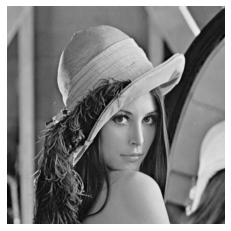

In [3]:
import matplotlib.pyplot as plt

img = tf.io.read_file(filename='lena.png')
img = tf.image.decode_png(img, channels=1)/255
x = tf.reshape(img,[1,512,512,1])

print('Input tensor shape:',x.shape)

plt.imshow(img,cmap='gray')
plt.axis(False)

plt.show()

**卷积层实现Sobel算子**
+ 构建包含2个卷积核的2维卷积层
+ 分别将x方向和y方向Sobel算子导入两个卷积核的权值参数
    - x方向的Sobel滤波输出
    $$ G_x = \left[\begin{matrix}-1&0&+1\\-2&0&+2\\-1&0&+1\end{matrix} \right] \ast I $$
    - y方向的Sobel滤波输出
    $$ G_y = \left[\begin{matrix}-1&-2&-1\\0&0&0\\+1&+2&+1\end{matrix} \right] \ast I $$

In [4]:
kernel = np.zeros([3,3,1,2])
kernel[:,:,0,0] = np.array([[-1,0,+1], [-2,0,+2],[-1,0,+1]])
kernel[:,:,0,1] = np.array([[-1,-2,-1], [0,0,0],[+1,+2,+1]])
kernel = tf.constant(kernel,dtype=tf.float32)

print('Kernel tensor shape:',kernel.shape)

y = tf.nn.conv2d(x, kernel, strides=1, padding='SAME')
print('Output tensor shape:',y.shape)

Kernel tensor shape: (3, 3, 1, 2)
Output tensor shape: (1, 512, 512, 2)


**计算和显示Sobel边缘图像**
+ Sobel边缘计算
    $$ G = \sqrt{G_x^2+G_y^2} $$

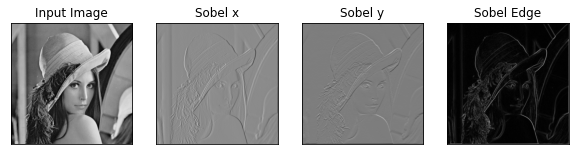

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(10, 3),subplot_kw={'xticks': (), 'yticks': ()})

axes[0].imshow(img,cmap='gray')
axes[0].set_title("Input Image")

image = tf.reshape(y[:,:,:,0],[512,512,1])
axes[1].imshow(image,cmap='gray')
axes[1].set_title('Sobel x')

image = tf.reshape(y[:,:,:,1],[512,512,1])
axes[2].imshow(image,cmap='gray')
axes[2].set_title('Sobel y')

Sobel_Image = tf.sqrt(y[:,:,:,0]*y[:,:,:,0]+y[:,:,:,1]*y[:,:,:,1])

axes[3].imshow(Sobel_Image[0,],cmap='gray')
axes[3].set_title('Sobel Edge')

plt.show()